__детектор лиц Виолы-Джонса__

Евгений Борисов <esborisov@sevsu.ru>

---

Rapid Object Detection using a Boosted Cascade of Simple Features   
Paul Viola , Michael Jones,  
proceedings IEEE Conf. on Computer Vision and Pattern Recognition (CVPR 2001),  

http://vision.stanford.edu/teaching/cs231b_spring1213/papers/CVPR01_ViolaJones.pdf

---

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import cv2
cv2.__version__

'4.6.0'

In [3]:
!ls ../data/detector-face-vj

scale.jpg  sevgu.jpg


In [4]:
test_image_file = '../data/detector-face-vj/sevgu.jpg'  
# test_image_file = '../data/detector-face-vj/scale.jpg'

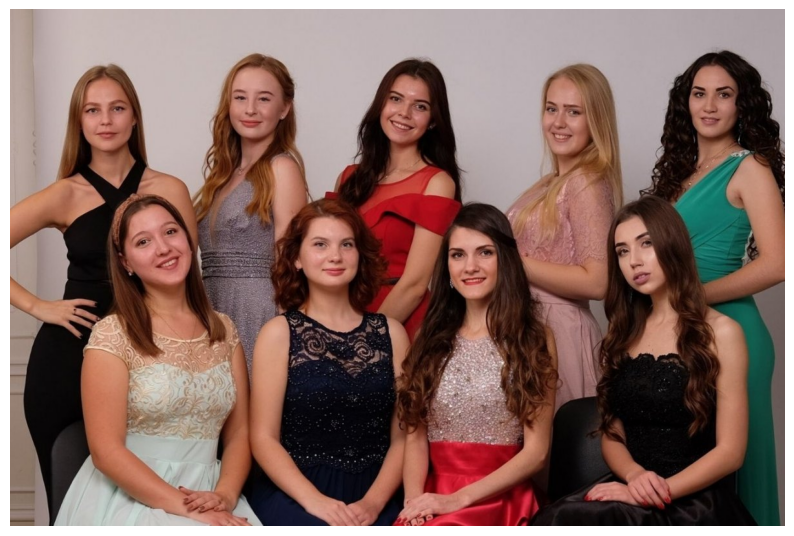

In [5]:
plt.figure(figsize=(10,10))
plt.axis(False)
plt.imshow(cv2.cvtColor(cv2.imread(test_image_file),cv2.COLOR_BGR2RGB))

In [6]:
# подгружаем параметры классификатора

from os.path import exists

cascPath = '/usr/share/opencv4/haarcascades/haarcascade_frontalface_default.xml'
assert exists(cascPath), 'file not found'
face_cascade = cv2.CascadeClassifier(cascPath)

cascPath = "/usr/share/opencv4/haarcascades/haarcascade_eye_tree_eyeglasses.xml"
assert exists(cascPath), 'file not found'
eyes_cascade = cv2.CascadeClassifier(cascPath)

In [7]:
frame = cv2.imread(test_image_file) # оригинальная картинка
gray = cv2.cvtColor( frame, cv2.COLOR_BGR2GRAY) # конвертируем в grayscale

# масштабируем картинку 
s = (320,240)
gray_small = cv2.resize(gray,s )

h,w,_ = frame.shape # размер оригинала 
f = (w/s[0],h/s[1]) # scale factor

In [8]:
# ищем лица на фото
faces = face_cascade.detectMultiScale(gray_small, scaleFactor=1.1, minNeighbors=3, ) # minSize=(5, 5))

for (x,y,w,h) in faces:
    x,w = int(x*f[0]), int(w*f[0])
    y,h = int(y*f[1]), int(h*f[1]) 
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)

    roi_frame = frame[y:y+h, x:x+w]
    roi_gray = gray[y:y+h, x:x+w]
    
    # ищем глаза в окне с лицом
    eyes = eyes_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        r = int(max(ew/2.0,eh/2.0))
        cx,cy = ex+r,ey+r
        cv2.circle(roi_frame, (cx,cy),r,(0,255,0),2)

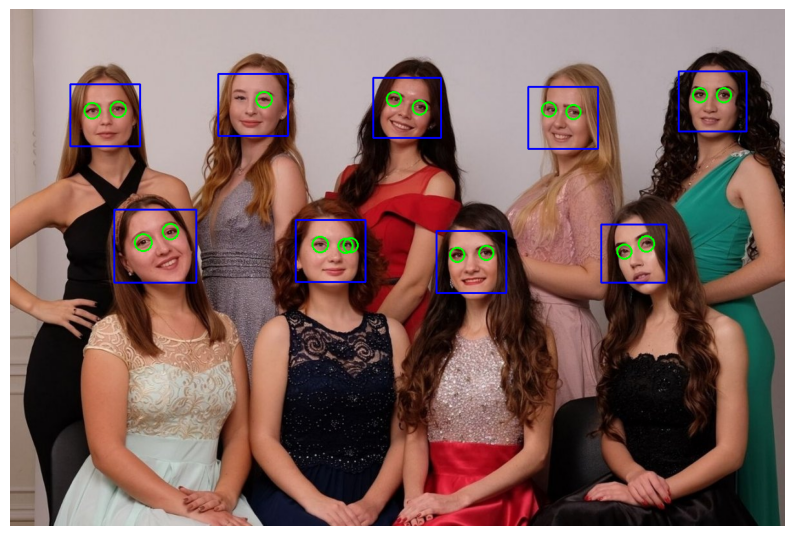

In [9]:
plt.figure(figsize=(10,10))
plt.axis(False)
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))